In [1]:
from pathlib import Path
ROOT_DIR = str(Path().resolve().parent)

In [2]:
import os
import regex as re
import seaborn as sns
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

# Arbitrary Polynomials

In [3]:
import collections
model_performance = collections.defaultdict(dict)
folder_path = os.path.join(ROOT_DIR, r'tb_logs\Polynomials')
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("0"):
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)
            if len(model_name) == 0:
                continue
            else:
                model_name = model_name[0]
                polynomial_name = re.findall(r'\\Polynomials\\(\S+)\\' + model_name, path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                for tag in event_acc.Tags()['scalars']:
                    if "rrse" in tag:
                        model_performance[polynomial_name][model_name] = event_acc.Scalars(tag)[-1].value

data=pd.DataFrame.from_dict(model_performance).T[['DummyRegressor', 'PANN', 'CCP', 'PDCLow', 'PDC']]

In [4]:
data.style.format("{:.3f}")

,DummyRegressor,PANN,CCP,PDCLow,PDC
2a2_b2_c2-3d,nan,0.834,0.349,0.350,0.387
2a3_6b2,nan,0.400,0.045,0.220,0.014
2a3_b2-3c,nan,0.457,0.193,0.038,0.027
2a3_b2_c2-d6,nan,0.861,0.522,0.451,0.465
2a3_b3-3c,nan,0.722,0.487,0.206,0.045
5a2+6b2,nan,0.008,0.005,0.008,0.001
a,3.737,0.000,0.000,0.000,0.000
a10-b9,nan,1.237,0.975,1.050,0.793
a2,nan,0.000,0.001,0.000,0.000
a3_b2_c2_d3-e5_f5,1.000,4.690,2.672,1.862,2.249


In [21]:
import matplotlib
poly = "a_b_c_d_e_f_g"
poly_title = "a"
poly_path = os.path.join(r'tb_logs\Polynomials', poly)
folder_path = os.path.join(ROOT_DIR, poly_path)
model_performance = {}
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)
            if len(model_name) == 0:
                continue
            else:
                model_name = model_name[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                model_performance[model_name] = []
                for tag in event_acc.Tags()['scalars']:
                    if "test_rrse" in tag:
                        model_performance[model_name].append(event_acc.Scalars(tag)[-1].value)
        elif name.endswith("0"):
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)[0]
            if model_name in ("LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor", "GaussianProcessRegressor"):
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                model_performance[model_name] = []
                for tag in event_acc.Tags()['scalars']:
                    if "test_rrse" in tag:
                        model_performance[model_name].append(event_acc.Scalars(tag)[-1].value)
            else:
                continue

In [22]:
event_acc.Tags()['scalars']

['hp_metric',
 'test_r2/dataloader_idx_8',
 'test_mae/dataloader_idx_8',
 'test_rrse/dataloader_idx_8',
 'test_mse/dataloader_idx_8',
 'test_r2/dataloader_idx_7',
 'test_mae/dataloader_idx_7',
 'test_rrse/dataloader_idx_7',
 'test_mse/dataloader_idx_7',
 'test_r2/dataloader_idx_6',
 'test_mae/dataloader_idx_6',
 'test_rrse/dataloader_idx_6',
 'test_mse/dataloader_idx_6',
 'test_r2/dataloader_idx_5',
 'test_mae/dataloader_idx_5',
 'test_rrse/dataloader_idx_5',
 'test_mse/dataloader_idx_5',
 'test_r2/dataloader_idx_4',
 'test_mae/dataloader_idx_4',
 'test_rrse/dataloader_idx_4',
 'test_mse/dataloader_idx_4',
 'test_r2/dataloader_idx_3',
 'test_mae/dataloader_idx_3',
 'test_rrse/dataloader_idx_3',
 'test_mse/dataloader_idx_3',
 'test_r2/dataloader_idx_2',
 'test_mae/dataloader_idx_2',
 'test_rrse/dataloader_idx_2',
 'test_mse/dataloader_idx_2',
 'test_r2/dataloader_idx_1',
 'test_mae/dataloader_idx_1',
 'test_rrse/dataloader_idx_1',
 'test_mse/dataloader_idx_1',
 'test_r2/dataloader_idx_0

In [23]:
t = pd.DataFrame.from_dict(model_performance)[['PANN', 'CCP', 'PDCLow', 'PDC']]
t.index = reversed(["N(-50,1)", "N(-50,5)", "N(-50,25)", "N(0,1)", "N(0,5)", "N(0,25)", "N(90,1)", "N(90,5)", "N(90,25)"])
t

,PANN,CCP,PDCLow,PDC
"N(90,25)",1.394912,1.852101,1.576953,1.628204
"N(90,5)",6.058440,7.857787,6.799229,6.945741
"N(90,1)",30.243158,39.082184,33.739189,34.503746
"N(0,25)",2.576103,1.546512,1.340603,1.352546
"N(0,5)",2.719679,1.631490,1.496054,1.523833
"N(0,1)",5.402791,12.120272,12.044658,31.958927
"N(-50,25)",1.022922,1.341726,1.099025,1.174737
"N(-50,5)",3.377594,4.485326,3.740811,3.949619
"N(-50,1)",16.504761,21.762106,18.361914,19.136047


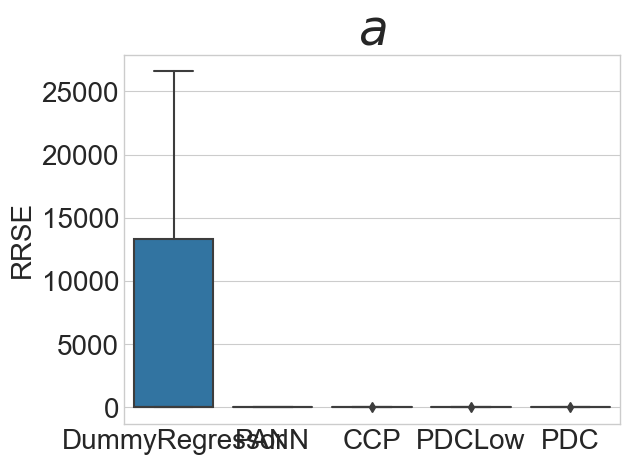

In [25]:
ax = sns.boxplot(data=pd.DataFrame.from_dict(model_performance)[['DummyRegressor', 'PANN', 'CCP', 'PDCLow', 'PDC']])
ax.set_title(f"${poly_title}$", fontsize=35)
ax.set_ylabel("RRSE", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=20)
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.0e"))
fig = ax.get_figure()
#fig.savefig(os.path.join(ROOT_DIR, "report\\arbitrary_polynomials\\" + folder_path.split("\\")[-1]), bbox_inches="tight")

# Optimization Functions

In [3]:
import collections
model_performance = collections.defaultdict(dict)
folder_path = os.path.join(ROOT_DIR, r"tb_logs\Optimization")
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("0"):
            func_name = re.findall(r'\\Optimization\\([A-Za-z]*\d*)', path)[0]
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
            for tag in event_acc.Tags()['scalars']:
                if "val_rrse" in tag:
                        model_performance[func_name][model_name] = event_acc.Scalars(tag)[-1].value

In [4]:
val_data = pd.DataFrame.from_dict(model_performance).T
val_data.loc[["Currin", "Bukin06", "Price03", "DettePepelyshev", "Colville", "LimPolynomial", "CamelThreeHump", "Beale", "GoldsteinPrice"],['DummyRegressor', 'LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', "GaussianProcessRegressor", 'PANN', 'CCP', 'PDCLow', 'PDC']].style.format("{:.3e}")

,DummyRegressor,LinearRegression,GradientBoostingRegressor,RandomForestRegressor,GaussianProcessRegressor,PANN,CCP,PDCLow,PDC
Currin,1.000e+00,5.045e-01,3.672e-02,3.848e-03,1.586e-06,3.146e-06,6.612e-06,3.671e-06,5.348e-07
Bukin06,1.000e+00,7.017e-01,1.356e-01,8.755e-03,5.093e-02,4.882e-01,4.960e-01,4.889e-01,4.863e-01
Price03,1.000e+00,1.000e+00,2.634e-02,7.157e-03,1.364e+00,1.424e+00,1.415e+00,1.418e+00,1.417e+00
DettePepelyshev,1.000e+00,9.187e-01,8.581e-02,2.621e-02,5.473e-05,9.031e-02,1.799e-02,1.088e-01,8.702e-03
Colville,1.000e+00,9.858e-01,6.799e-02,5.017e-02,6.237e-01,6.240e-02,2.057e-02,1.466e-02,5.628e-03
LimPolynomial,1.000e+00,6.198e-01,2.908e-02,4.007e-03,3.946e-06,3.186e-02,8.583e-03,8.909e-03,4.589e-03
CamelThreeHump,1.000e+00,1.000e+00,1.636e-02,2.507e-03,4.016e-06,3.803e-02,5.316e-03,1.476e-02,7.199e-03
Beale,1.000e+00,9.994e-01,1.131e-01,1.569e-02,2.039e-05,3.813e-02,1.453e-02,5.993e-03,4.539e-03
GoldsteinPrice,1.000e+00,8.605e-01,6.497e-02,6.914e-03,9.653e-06,1.205e-01,8.865e-02,1.057e-01,8.595e-02


In [5]:
import collections
model_performance = collections.defaultdict(dict)
folder_path = os.path.join(ROOT_DIR, r"tb_logs\Optimization")
for path, subdirs, files in os.walk(folder_path):
    for name in files:
        if name.endswith("1"):
            func_name = re.findall(r'\\Optimization\\([A-Za-z]*\d*)', path)[0]
            model_name = re.findall(r'\\([A-Za-z]*)\\version', path)[0]
            eventfile_path = os.path.join(path, name)
            event_acc = EventAccumulator(eventfile_path)
            event_acc.Reload()
        elif name.endswith("0"):
                model_name = re.findall(r'\\([A-Za-z]*)\\version', path)[0]
                if model_name in ("LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor", "GaussianProcessRegressor", "DummyRegressor"):
                    eventfile_path = os.path.join(path, name)
                    event_acc = EventAccumulator(eventfile_path)
                    event_acc.Reload()
                else:
                    continue
        for tag in event_acc.Tags()['scalars']:
            if "test_rrse" in tag:
                    model_performance[func_name][model_name] = event_acc.Scalars(tag)[-1].value

In [6]:
test_data = pd.DataFrame.from_dict(model_performance).T
test_data.loc[["Currin", "Bukin06", "Price03", "DettePepelyshev", "Colville", "LimPolynomial", "CamelThreeHump", "Beale", "GoldsteinPrice"],['DummyRegressor', 'LinearRegression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'GaussianProcessRegressor', 'PANN', 'CCP', 'PDCLow', 'PDC']].style.format("{:.3e}")

,DummyRegressor,LinearRegression,GradientBoostingRegressor,RandomForestRegressor,GaussianProcessRegressor,PANN,CCP,PDCLow,PDC
Currin,1.282e+00,8.779e-01,1.892e-01,1.609e-01,4.588e-05,4.518e-06,1.057e-05,4.248e-06,4.110e-07
Bukin06,1.301e+00,1.189e+00,1.578e-01,1.209e-01,7.781e+00,6.599e-01,6.604e-01,6.672e-01,6.525e-01
Price03,9.162e+00,9.067e+00,2.620e+00,2.611e+00,1.019e+01,1.121e+01,1.113e+01,1.112e+01,1.112e+01
DettePepelyshev,3.184e+00,3.109e+00,8.020e-01,8.148e-01,2.410e-03,2.082e-01,4.043e-02,4.118e-01,3.113e-02
Colville,5.044e+00,5.021e+00,1.685e+00,1.613e+00,6.013e+00,2.128e-01,1.136e-01,3.555e-02,1.978e-02
LimPolynomial,1.002e+00,2.413e-01,1.378e-01,1.377e-01,9.017e-05,3.285e-02,1.760e-02,1.817e-02,9.474e-03
CamelThreeHump,4.695e+00,4.686e+00,1.891e+00,1.878e+00,5.466e-02,1.677e-01,4.045e-02,1.260e-01,5.513e-02
Beale,5.170e+00,5.227e+00,2.388e+00,2.284e+00,5.326e-02,6.398e-02,7.387e-02,2.315e-02,2.237e-02
GoldsteinPrice,1.271e+00,1.168e+00,3.096e-01,2.988e-01,8.818e-04,1.018e-01,1.505e-01,1.345e-01,1.068e-01


# Epidemiology

In [3]:
seq_len = [2, 6, 12, 24, 30, 40, 60, 120]
model_performance = {}
for length in seq_len:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\' + str(length) + "len_1lag")
    model_performance[length] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                
                metric_value = 0
                metric_count = 0
                for tag in event_acc.Tags()['scalars']:
                    if "val_rrse" in tag:
                        metric_value += event_acc.Scalars(tag)[-1].value
                        metric_count += 1
                model_performance[length][model_name] = metric_value / metric_count

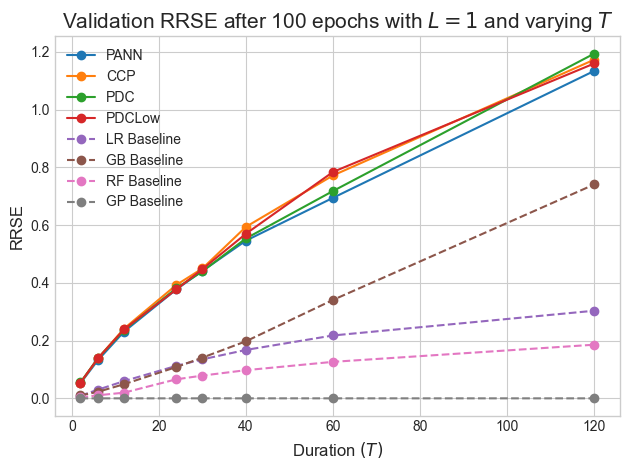

In [4]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline",
                  "GaussianProcessRegressor": "GP Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["PANN", "CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline", "GP Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Validation RRSE after 100 epochs with $L=1$ and varying $T$", fontsize=15)
ax.set_xlabel(r"Duration $(T)$", fontsize=12)
ax.set_ylabel("RRSE", fontsize=12)
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/val_results_fixed_l.png"), bbox_inches="tight")

In [5]:
df_sim_val = df_models

In [6]:
seq_len = [2, 6, 12, 24, 30, 40, 60, 120]
model_performance = {}
for length in seq_len:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\' + str(length) + "len_1lag")
    model_performance[length] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("1"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
            elif name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                if model_name in ("LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor", "GaussianProcessRegressor"):
                    eventfile_path = os.path.join(path, name)
                    event_acc = EventAccumulator(eventfile_path)
                    event_acc.Reload()
                else:
                    continue
            metric_value = 0
            metric_count = 0
            for tag in event_acc.Tags()['scalars']:
                if "test_rrse" in tag:
                    metric_value += event_acc.Scalars(tag)[-1].value
                    metric_count += 1
            model_performance[length][model_name] = metric_value / metric_count

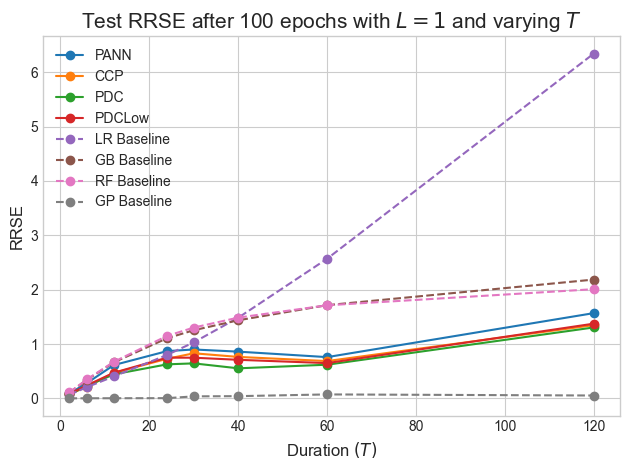

In [7]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline",
                  "GaussianProcessRegressor": "GP Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["PANN", "CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline", "GP Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Test RRSE after 100 epochs with $L=1$ and varying $T$", fontsize=15)
ax.set_xlabel(r"Duration $(T)$", fontsize=12)
ax.set_ylabel("RRSE", fontsize=12)
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/test_results_fixed_l.png"), bbox_inches="tight")

In [8]:
df_sim_test = df_models

In [9]:
from matplotlib.ticker import MaxNLocator
lag_size = [1, 2, 3, 4, 5]
model_performance = {}
for lag in lag_size:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\120len_' +  str(lag) + "lag")
    model_performance[lag] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
                
                metric_value = 0
                metric_count = 0
                for tag in event_acc.Tags()['scalars']:
                    if "val_rrse" in tag:
                        metric_value += event_acc.Scalars(tag)[-1].value
                        metric_count += 1
                model_performance[lag][model_name] = metric_value / metric_count

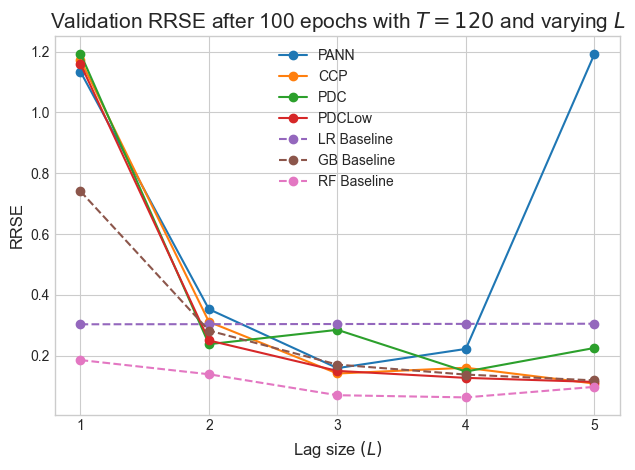

In [10]:
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline",
                  "GaussianProcessRegressor": "GP Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["PANN", "CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Validation RRSE after 100 epochs with $T=120$ and varying $L$", fontsize=15)
ax.set_xlabel(r"Lag size $(L)$", fontsize=12)
ax.set_ylabel("RRSE", fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/val_results_fixed_t.png"), bbox_inches="tight")

In [11]:
df_lag_val = df_models

In [12]:
lag_size = [1, 2, 3, 4, 5]
model_performance = {}
for lag in lag_size:
    folder_path = os.path.join(ROOT_DIR, r'tb_logs\Epidemiology\\120len_' + str(lag) + "lag")
    model_performance[lag] = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if name.endswith("1"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                eventfile_path = os.path.join(path, name)
                event_acc = EventAccumulator(eventfile_path)
                event_acc.Reload()
            elif name.endswith("0"):
                model_name = re.findall(r'\\([a-zA-z]*)\\version', path)[0]
                if model_name in ("LinearRegression", "GradientBoostingRegressor", "RandomForestRegressor", "GaussianProcessRegressor"):
                    eventfile_path = os.path.join(path, name)
                    event_acc = EventAccumulator(eventfile_path)
                    event_acc.Reload()
                else:
                    continue
            metric_value = 0
            metric_count = 0
            for tag in event_acc.Tags()['scalars']:
                if "test_rrse" in tag:
                    metric_value += event_acc.Scalars(tag)[-1].value
                    metric_count += 1
            model_performance[lag][model_name] = metric_value / metric_count

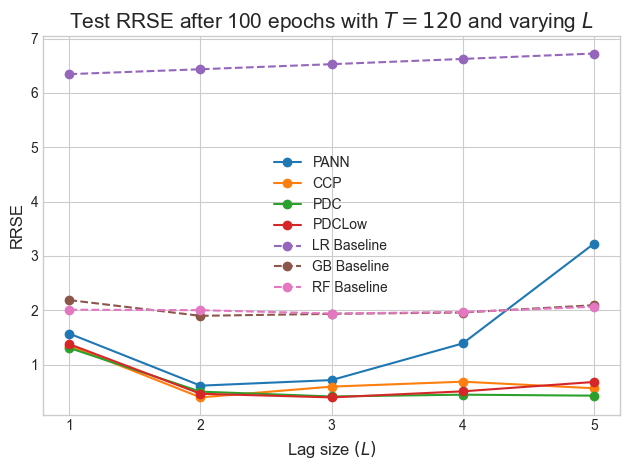

In [13]:
from matplotlib.ticker import MaxNLocator
df_models = pd.DataFrame.from_dict(model_performance).T
df_models.rename({"GradientBoostingRegressor": "GB Baseline", 
                  "LinearRegression": "LR Baseline", 
                  "RandomForestRegressor": "RF Baseline",
                  "GaussianProcessRegressor": "GP Baseline"}, axis=1, inplace=True)
df_mnn = df_models[["PANN", "CCP", "PDC", "PDCLow"]]
df_baselines = df_models[["LR Baseline", "GB Baseline", "RF Baseline"]]
fig, ax = plt.subplots()
df_mnn.plot(style="-o", ax=ax)
df_baselines.plot(marker="o", linestyle="dashed", ax=ax)
ax.legend()
ax.set_title("Test RRSE after 100 epochs with $T=120$ and varying $L$", fontsize=15)
ax.set_xlabel(r"Lag size $(L)$", fontsize=12)
ax.set_ylabel("RRSE", fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/test_results_fixed_t.png"), bbox_inches="tight")

In [54]:
df_lag_test = df_models

In [39]:
df_sim_val = df_sim_val.loc[24:, ["PANN", "CCP", "PDCLow", "PDC"]]
df_sim_test = df_sim_test.loc[24:, ["PANN", "CCP", "PDCLow", "PDC"]]

In [40]:
df_lag_val = df_lag_val.loc[::-1, ["PANN", "CCP", "PDCLow", "PDC"]].copy()
df_lag_test = df_lag_test.loc[::-1, ["PANN", "CCP", "PDCLow", "PDC"]].copy()
df_lag_val.index = df_sim_val.index
df_lag_test.index = df_sim_test.index

In [41]:
df_sim_val.min(axis=1)-df_lag_val.min(axis=1)

24     0.268476
30     0.312565
40     0.404518
60     0.456452
120    0.000000
dtype: float64

In [42]:
df_sim_test.min(axis=1)-df_lag_test.min(axis=1)

24     0.199072
30     0.198368
40     0.157430
60     0.223354
120    0.000000
dtype: float64

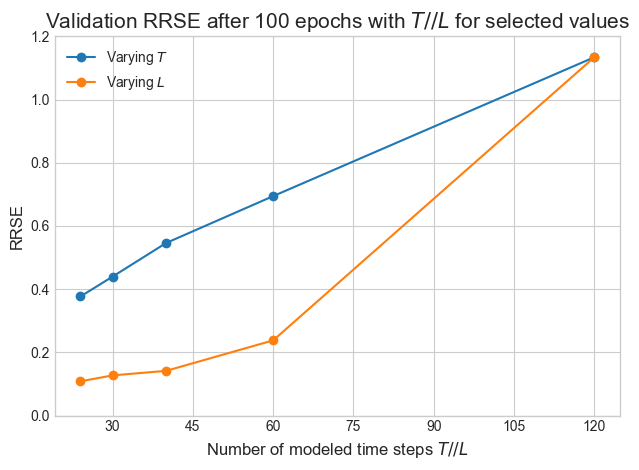

In [42]:
fig, ax = plt.subplots()
df_sim_val.min(axis=1).plot(style="-o", ax=ax)
df_lag_val.min(axis=1).plot(style="-o", ax=ax)
ax.legend(["Varying $T$", "Varying $L$"])
ax.set_title("Validation RRSE after 100 epochs with $T//L$ for selected values", fontsize=15)
ax.set_xlabel(r"Number of modeled time steps $T//L$", fontsize=12)
ax.set_ylabel("RRSE", fontsize=12)
ax.set_ylim([0, 1.2])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/val_results_t_l.png"), bbox_inches="tight")

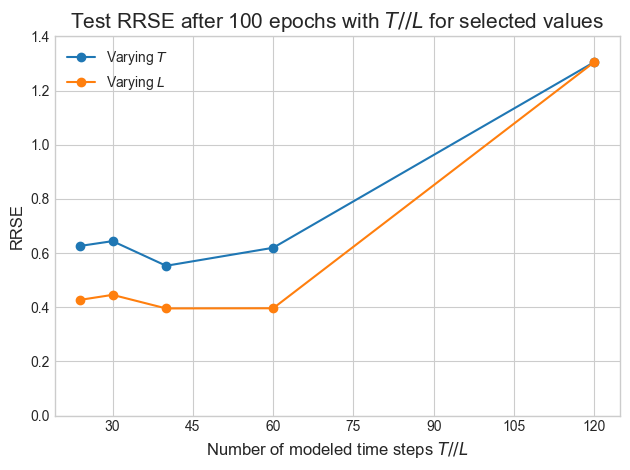

In [47]:
fig, ax = plt.subplots()
df_sim_test.min(axis=1).plot(style="-o", ax=ax)
df_lag_test.min(axis=1).plot(style="-o", ax=ax)
ax.legend(["Varying $T$", "Varying $L$"])
ax.set_title("Test RRSE after 100 epochs with $T//L$ for selected values", fontsize=15)
ax.set_xlabel(r"Number of modeled time steps $T//L$", fontsize=12)
ax.set_ylabel("RRSE", fontsize=12)
ax.set_ylim([0, 1.4])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig(os.path.join(ROOT_DIR, "report/sir_simulation/test_results_t_l.png"), bbox_inches="tight")

In [52]:
def test_seq_len_number(number):
    if (number%1 == 0) and (number%2 == 0) and (number%3==0) and (number%4==0) and (number%5==0):
        return True
    else:
        return False

In [53]:
[i for i in range(2, 150) if test_seq_len_number(i)]

[60, 120]

In [54]:
[i for i in range(2, 150) if test_seq_len_number(i)]

[60, 120]